### Project 1 (By: Kashif Ansari)

In [1]:
#Connecting google drive
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [2]:
# Change the working directory
path_to_folder = "ENPM673/tutorials"
%cd /content/drive/My\ Drive/{path_to_folder}

/content/drive/My Drive/ENPM673/tutorials


In [3]:
#Importing the required libraries
import cv2
import os
from matplotlib import pyplot as plt
from google.colab import drive
from google.colab.patches import cv2_imshow
from IPython.display import clear_output
import numpy as np
from IPython.display import clear_output


### Reading Images

The code below reads a video file named 'object_tracking.mp4' using OpenCV (cv2). It then extracts properties such as frame width, frame height, and frames per second (fps). After that, it initializes a VideoWriter object to save the processed video with the same properties as the input video but with the name 'output_video.mp4'.

Next, it iterates through each frame of the input video, finding the coordinates of dark pixels (pixels with values less than 10) in each frame. It then calculates the centroid (average position) of these dark pixels and draws a green circle at that centroid position on each frame. The centroid positions are also stored in lists.

Finally, it converts each frame to grayscale, displays it, and writes it to the output video file. Once all frames have been processed, it releases the VideoCapture and VideoWriter objects, indicating the end of the process.

### Reading Video

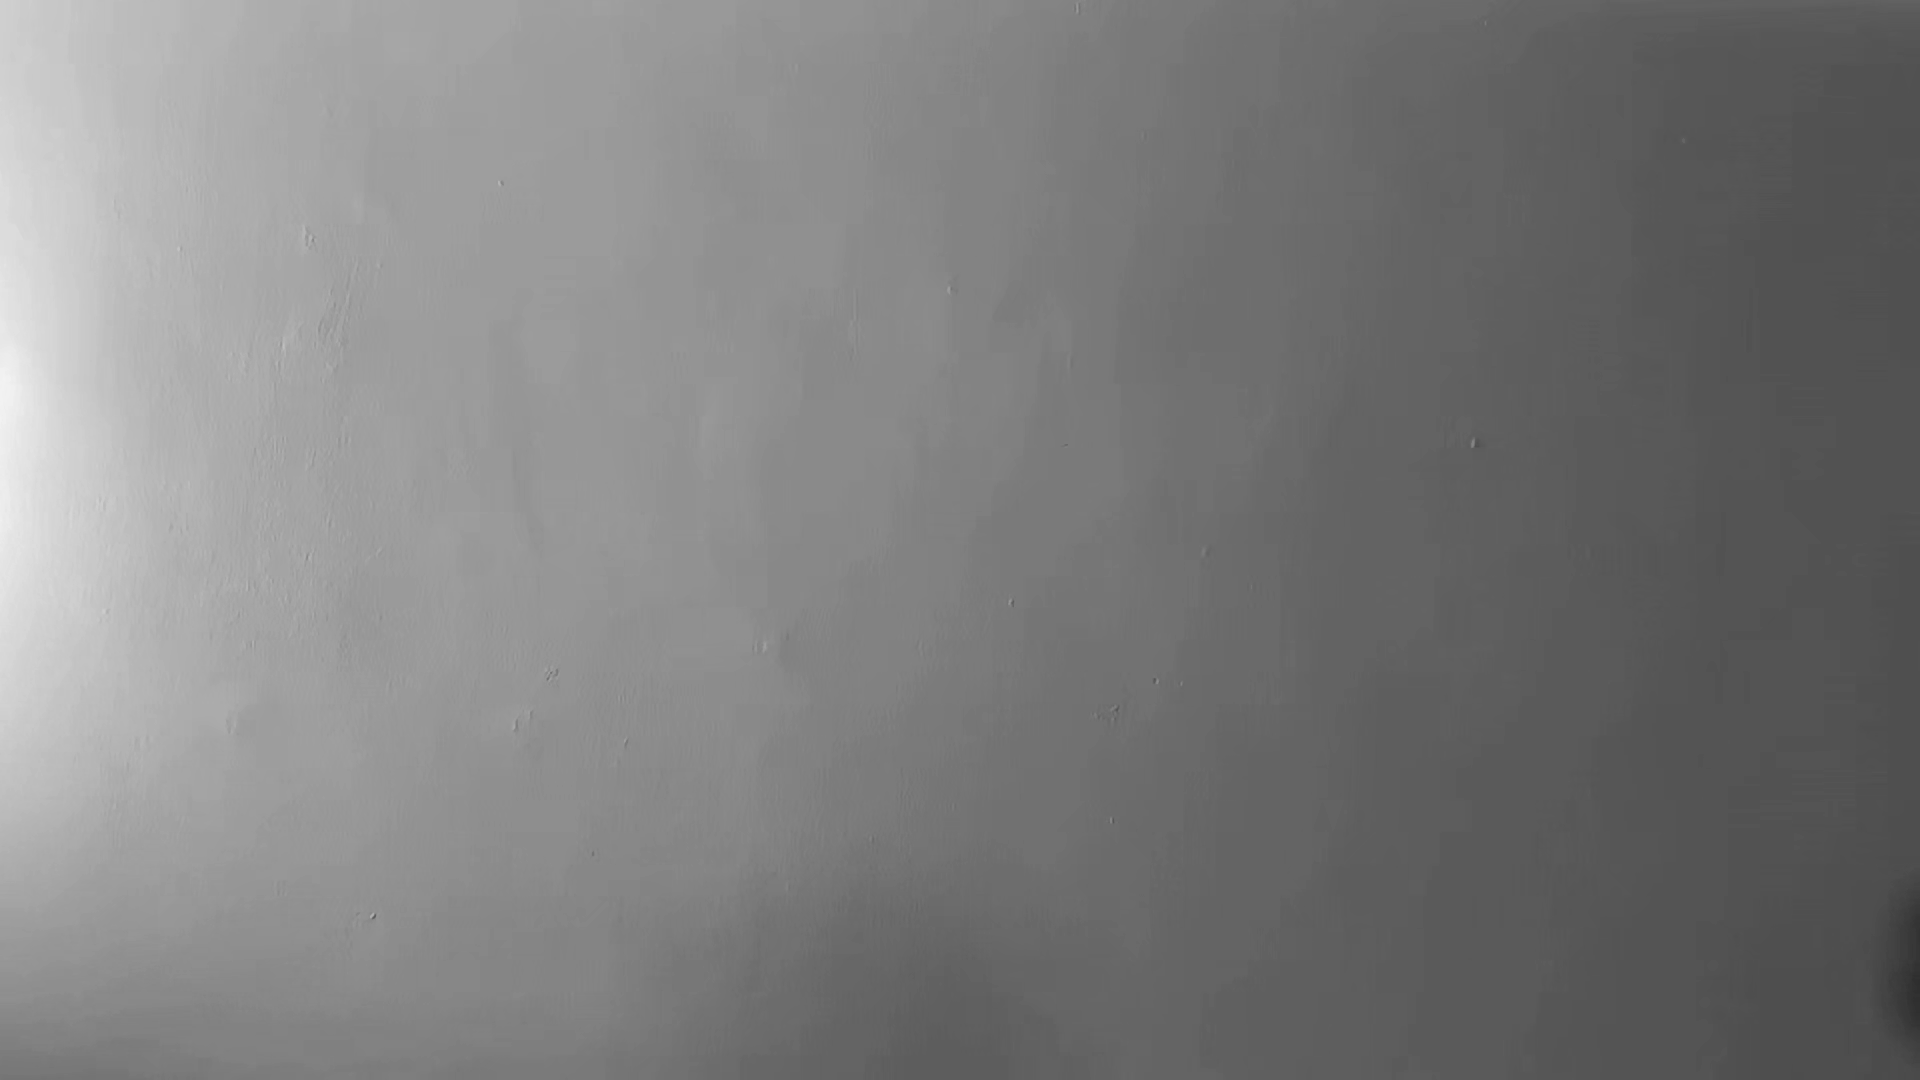

In [4]:
# Read a video
video_capture = cv2.VideoCapture('assets/object_tracking.mp4')

# Get video properties
frame_width = int(video_capture.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(video_capture.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(video_capture.get(cv2.CAP_PROP_FPS))

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output_video.mp4', fourcc, 30.0, (frame_width, frame_height), 0)

# Read and save each frame
dark_pixels_x = []
dark_pixels_y = []

centroid_x_list = np.array([])
centroid_y_list = np.array([])

#Loop to return the frame captured
while True:
    ret, frame = video_capture.read()
    if not ret:
        break

    # Find coordinates of dark pixels in the frame
    dark_pixel_coordinates = np.where(frame < 10)
    dark_pixel_x = dark_pixel_coordinates[1]  # x coordinates (column indices)
    dark_pixel_y = dark_pixel_coordinates[0]  # y coordinates (row indices)

    #Capturing boundry pixels
    if dark_pixel_x.size > 0 and dark_pixel_y.size > 0:
      max_x = np.max(dark_pixel_x)
      min_x = np.min(dark_pixel_x)
      max_y = np.max(dark_pixel_y)
      min_y = np.min(dark_pixel_y)

      #Calculating centroid
      centroid_x_co = int((min_x)+((max_x-min_x)//2))
      centroid_y_co = int((min_y)+((max_y-min_y)//2))


      # print(centroid_x_co)
      centroid_x_list = np.append(centroid_x_list, centroid_x_co)
      centroid_y_list = np.append(centroid_y_list, centroid_y_co)


      # Circle parameters
      center_coordinates = (centroid_x_co, centroid_y_co)  # Center of circle
      radius = 10  # Radius of the circle
      color = (0, 255, 0)  # Green color in BGR format
      thickness = -1  # Thickness of the circle outline (negative value to fill the circle)
      cv2.circle(frame, center_coordinates, radius, color, thickness)



    frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
    frame1 = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
    cv2_imshow(frame1)

    # Clear the output cell to update the frame
    clear_output(wait=True)
    out.write(frame1)



# Release VideoCapture and VideoWriter objects
video_capture.release()
out.release()

### Curve fitting process


This code calculates the coefficients (A, B, C) for a quadratic function that best fits the data points represented by the centroid positions stored in centroid_x_list and centroid_y_list.

In [5]:

centroid_x2_list = np.square(centroid_x_list)
# print(centroid_x2_list.shape)

# Create an array containing all elements as 1 with the same size as centroid_x2_list
ones_array = np.ones_like(centroid_x2_list)

# Stack the three arrays horizontally
combined_x_array = np.column_stack((centroid_x2_list, centroid_x_list, ones_array))
# print(combined_x_array.shape)
# print(combined_x_array)

#B is the matrix containing all the coefficients A,B,C
B = np.linalg.inv(combined_x_array.T @ combined_x_array) @ (combined_x_array.T @ centroid_y_list)
print(B)



[ 6.46970531e-04 -1.24536917e+00  9.86878990e+02]


In [6]:
#Getting corresponding Y cordinate (exp) from obtained value of A,B,C
exp = (B[0] * centroid_x2_list) + (B[1] * centroid_x_list) + B[2]
centroid_y_list.shape



(528,)

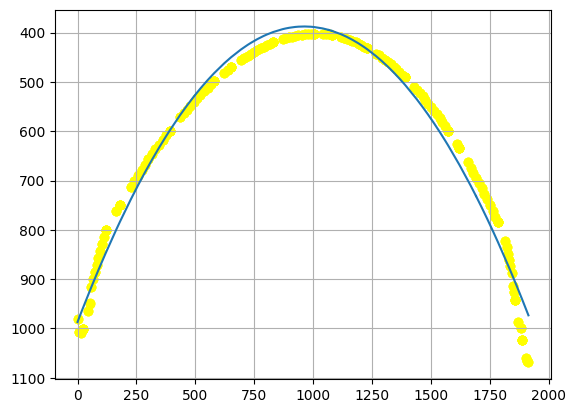

In [7]:
#Plotting the parabolic grpah
plt.scatter(centroid_x_list, centroid_y_list, color = "yellow")
plt.plot(centroid_x_list , exp)
#Inverting the parabola to match the graph
plt.gca().invert_yaxis()
plt.grid(True)

### Capturing frame and plotting graph

The code snippet below opens a video file named 'output_video.mp4' using OpenCV (cv2). It then checks if the video file was opened successfully. If not, it prints an error message and exits the program.

The code sets a desired time in milliseconds (desired_time_ms) to capture a frame from the video. For example, if desired_time_ms is set to 15000, it captures a frame at 15 seconds into the video.

Then, it sets the frame position in the video using video_capture.set(cv2.CAP_PROP_POS_MSEC, desired_time_ms).

Next, it reads the frame at the desired time using video_capture.read(). If the frame is not read successfully, it prints an error message and exits the program.

After that, it displays the frame using Matplotlib (plt.imshow(frame)), and plots a graph using the data stored in centroid_x_list and exp (assuming exp is defined elsewhere in the code). It then waits for any key to be pressed (cv2.waitKey(0)) and closes all OpenCV windows (cv2.destroyAllWindows()).

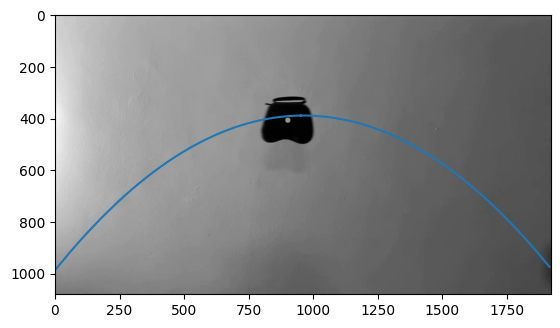

In [8]:
# Open the video file
video_capture = cv2.VideoCapture('output_video.mp4')  # Replace 'video.mp4' with your video file

# Check if the video opened successfully
if not video_capture.isOpened():
    print("Error: Could not open video file")
    exit()

# Set the desired time in milliseconds
desired_time_ms = 15000  # For example, to capture a frame at 5 seconds into the video

# Set the frame position in the video
video_capture.set(cv2.CAP_PROP_POS_MSEC, desired_time_ms)

# Read the frame at the desired time
ret, frame = video_capture.read()

# Check if the frame was read successfully
if not ret:
    print("Error: Could not read frame")
    exit()



# Display the frame (optional)
# cv2_imshow(frame)
plt.imshow(frame)
plt.plot(centroid_x_list , exp)
plt.gca().invert_yaxis
plt.show()

# Wait for any key to be pressed
cv2.waitKey(0)
cv2.destroyAllWindows()

# Release the video capture object
video_capture.release()


### Calculation for the unknown Y co-ordinate at gaiven X co-ordinate

In [9]:
#Calculating the y cordinate for the given x axis
given_x = 1000
a, b, c = tuple(B)
required_y = a*given_x**2 +b*given_x + c
print ("corresponding y cordinate is:", required_y)

corresponding y cordinate is: 388.4803497221982
